    AIM

This notebook will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user will click on an advertisement.

The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: advertising.csv         


In [ ]:
data = pd.read_csv('/content/advertising.csv')

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data.info

<bound method DataFrame.info of      Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                       68.95   35  ...  2016-03-27 00:53:11              0
1                       80.23   31  ...  2016-04-04 01:39:02              0
2                       69.47   26  ...  2016-03-13 20:35:42              0
3                       74.15   29  ...  2016-01-10 02:31:19              0
4                       68.37   35  ...  2016-06-03 03:36:18              0
..                        ...  ...  ...                  ...            ...
995                     72.97   30  ...  2016-02-11 21:49:00              1
996                     51.30   45  ...  2016-04-22 02:07:01              1
997                     51.63   51  ...  2016-02-01 17:24:57              1
998                     55.55   19  ...  2016-03-24 02:35:54              0
999                     45.01   26  ...  2016-06-03 21:43:21              1

[1000 rows x 10 columns]>

In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


analyze our data, let's first plot a histogram with Kernel density estimation for the 'Age' variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


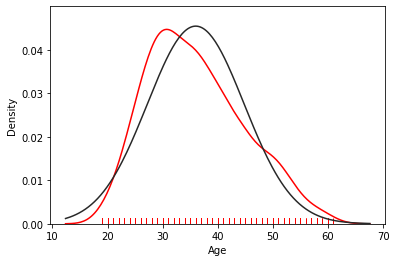

In [ ]:
from scipy.stats import norm
sns.distplot(data['Age'], hist=False, color='r', rug=True, fit=norm);

#**Kernel Distribution Estimation(Kdeplot)**
Plot which depicts the probability density function of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2064: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


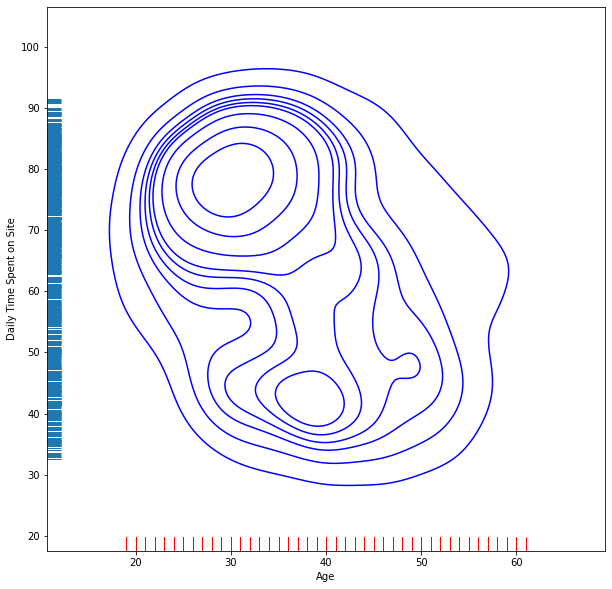

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data.Age, data['Daily Time Spent on Site'], color="b", ax=ax)
sns.rugplot(data.Age, color="r", ax=ax)
sns.rugplot(data['Daily Time Spent on Site'], vertical=True, ax=ax)

From the picture, we can conclude that younger users spend more time on the site. This implies that users of the age between 20 and 40 years can be the main target group for the marketing campaign.

#**Cubehelix Palette**
colormap with linearly-decreasing and increasing) brightness

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


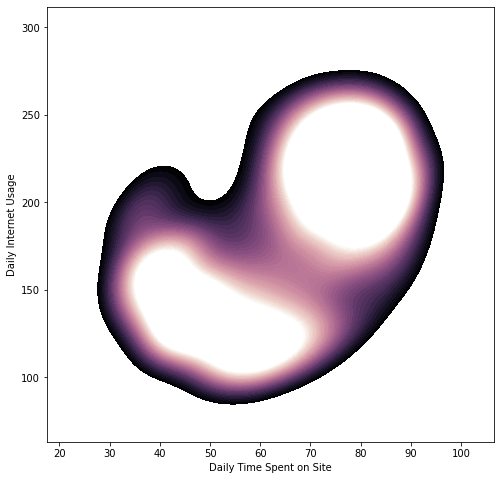

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(data["Daily Time Spent on Site"], data['Daily Internet Usage'],
    cmap=cmap, n_levels=100, shade=True);

From the figure above, it is clear that users who spend more time on the internet also spend more time on the site

Now we will show how to visualize trends in the data using the scatter_matrix function. We will include only numerical variables for performing analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe800a0d198>,
      dtype=object)

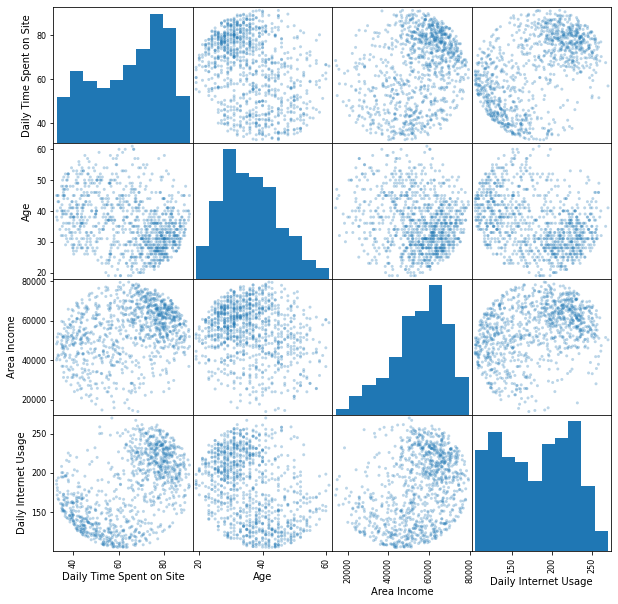

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],
    alpha=0.3, figsize=(10,10))

#**Data Preprocessing**
You may have noticed that "Ad Topic Line", "City", and "Country" are categorical columns. Let's plot all the unique values for these columns.

In [ ]:
object_variables = ['Ad Topic Line', 'City', 'Country']
data[object_variables].describe(include=['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Assimilated discrete strategy,Lisamouth,France
freq,1,3,9


As we can see from the table above that all the values in column "Ad Topic Line" is unique, while the "City" column contains 969 unique values out of 1000. There are too many unique elements within these two categorical columns and it is generally difficult to perform a prediction without the existence of a data pattern. Because of that, they will be omitted from further analysis.

In [ ]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


The table below shows the 20 most represented countries in our DataFrame.

In [ ]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


- Next, we will analyze the 'Timestamp' category. It represents the exact time when a user clicked on the advertisement.

- We will expand this category to 4 new categories: month, day of the month, day of the week, and hour. In this way, we will get new variables that an ML model will be able to process and find possible dependencies and correlations. 

- Since we have created new variables, we will exclude the original variable "Timestamp" from the table. The "Day of the week" variable contains values from 0 to 6, where each number represents a specific day of the week (from Monday to Sunday).

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


#**Train and Test Data Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Model Development and Fitting Procedures

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

The first model we will import will be a Logistic Regression model. First, it is necessary to load the LogisticRegression function from the sklearn.linear_model library

In [ ]:
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[158   4]
 [ 27 141]]


Our confusion matrix tells us that the total number of accurate predictions is 158 + 141 = 299. On the other hand, the number of incorrect predictions is 27 + 4 = 31

Now we will import DecisionTreeClassifier from sklearn.tree library. model_2 will be based on the decision tree technique, it will be trained as in the previous case, and desired predictions will be made

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9363636363636364

Confusion matrix:
[[152  10]
 [ 11 157]]


It can be concluded that the Decision Tree model showed better performances in comparison to the Logistic Regression model. The confusion matrix shows us that the 309 predictions have been done correctly and that there are only 21 incorrect